In [1]:
# we use this method when the data is skewed
# You should knowlegde of box plot and IQR 

In [2]:
import pandas as pd 
import numpy as np

In [3]:
df = pd.read_csv('placement.csv')

In [5]:
import seaborn as sns

In [7]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


<Axes: >

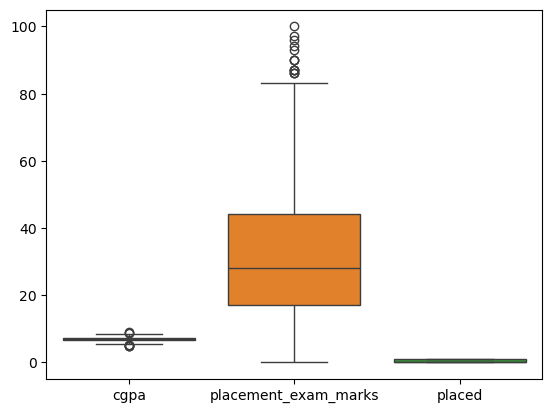

In [6]:
sns.boxplot(data = df)

<Axes: xlabel='cgpa'>

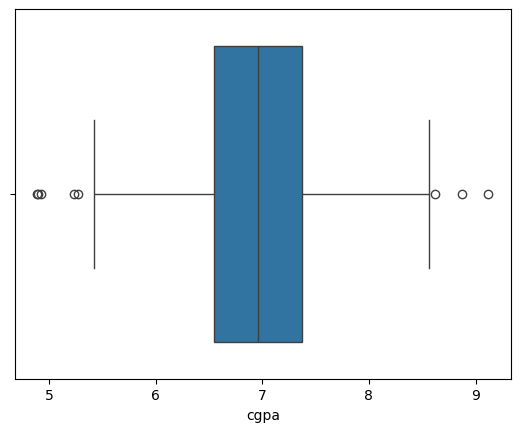

In [8]:
sns.boxplot(data = df , x ='cgpa')

In [9]:
import matplotlib.pyplot as plt 

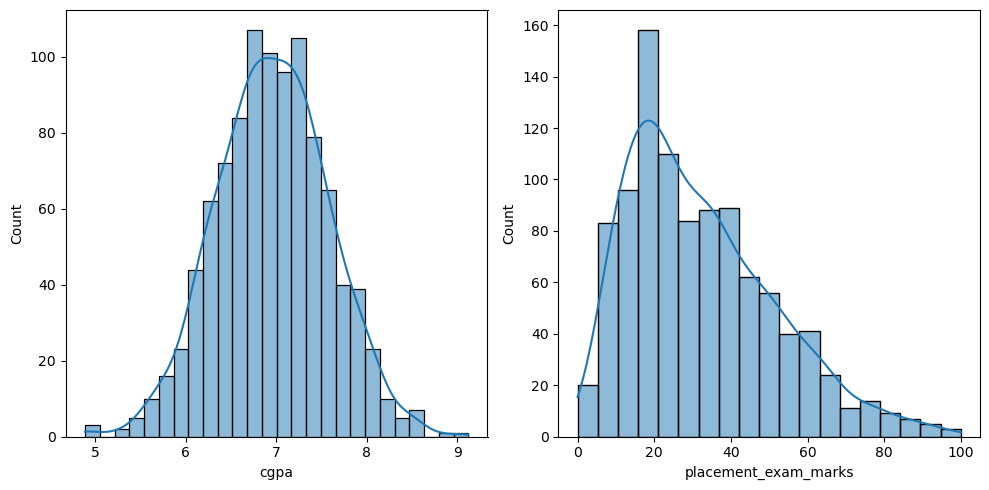

In [16]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.histplot(data=df, x='cgpa', kde=True)

plt.subplot(1, 2, 2)
sns.histplot(data=df, x='placement_exam_marks', kde=True)

plt.tight_layout()
plt.show()

In [17]:
print('The Minimum Value in cgpa' , df['cgpa'].min())
print('The Maximum Value in cgpa' , df['cgpa'].max())
print('The Standard Division Value in cgpa' , df['cgpa'].std())
print('The Mean Value in cgpa' , df['cgpa'].mean())

The Minimum Value in cgpa 4.89
The Maximum Value in cgpa 9.12
The Standard Division Value in cgpa 0.6158978751323894
The Mean Value in cgpa 6.96124


In [19]:
print("The Highest Value That is Allowed" ,df['cgpa'].mean() + 3 * df['cgpa'].std()  )
print("The Lowwest Value That is Allowed" ,df['cgpa'].mean()  - 3 * df['cgpa'].std()  )

The Highest Value That is Allowed 8.808933625397168
The Lowwest Value That is Allowed 5.113546374602832


In [20]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [24]:
# Lets find the IQR which is 75% - 25%
iqr = percentile75 - percentile25
iqr

np.float64(27.0)

In [28]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [29]:
lower_limit

np.float64(-23.5)

# trimming 

In [30]:
# lets delete all the rows are having outliers 
new_df = df[df['placement_exam_marks'] < upper_limit]

In [31]:
new_df.shape

(985, 3)

<Axes: xlabel='placement_exam_marks'>

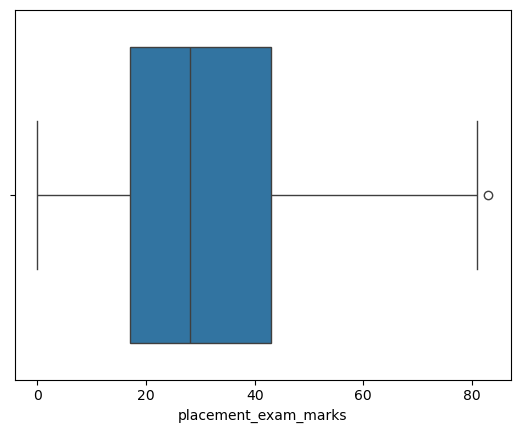

In [33]:
sns.boxplot(data = new_df , x = 'placement_exam_marks')

# Capping 

In [34]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks'] = np.where(    
    new_df_cap['placement_exam_marks'] > upper_limit ,
    upper_limit,
    np.where(  
        new_df_cap['placement_exam_marks'] < lower_limit ,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [35]:
new_df_cap.shape

(1000, 3)

In [37]:
print(df['placement_exam_marks'].max())
print(new_df_cap['placement_exam_marks'].max())

100.0
84.5


<Axes: xlabel='placement_exam_marks'>

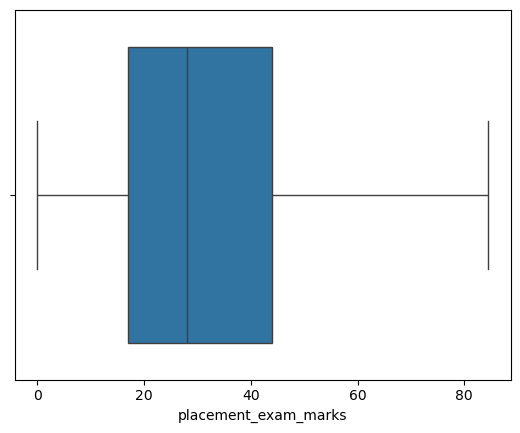

In [39]:
sns.boxplot(data = new_df_cap , x = 'placement_exam_marks')